<a href="https://colab.research.google.com/github/Hsuyeon01/ESAA/blob/main/1107_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06. 토픽 모델링 (Topic Modeling) - 20 뉴스그룹

토픽 모델링 
- 문서 집합에 숨어있는 주제를 찾아내는 것
- 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출

자주 사용되는 기법
- LSA
- LDA 
  - 사이킷런은 : LatentDirichletAllocation 클래스로 제공
  

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles','rec.sport.baseball','comp.graphics',
        'comp.windows.x','talk.politics.mideast','soc.religion.christian',
        'sci.electronics','sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출, fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('header','footers','quotes'),
                             categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2,
                             stop_words='english',ngram_range=(1,2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape :', feat_vect.shape)

CountVectorizer Shape : (7862, 1000)


In [5]:
# 토픽 개수 조정 (n_components)
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [8]:
# components_의 형태와 속성값
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.87175875e+02, 3.26401283e+02, 1.67643972e+02, ...,
        7.19452113e+01, 1.25032429e-01, 1.25031801e-01],
       [1.25100534e-01, 1.25200157e-01, 1.25116306e-01, ...,
        5.23417043e+00, 1.25013172e-01, 1.25003054e-01],
       [8.10165562e+01, 1.29756513e+01, 1.58877134e+01, ...,
        2.02263029e+01, 1.25006040e-01, 1.25000074e-01],
       ...,
       [4.47519574e+01, 2.07610664e-01, 4.16627335e+00, ...,
        6.91641165e+00, 1.25006504e-01, 1.25000079e-01],
       [3.40790460e+01, 1.68526498e+01, 1.07933631e+01, ...,
        6.35434267e+01, 1.25001835e-01, 1.25001866e-01],
       [1.25080974e-01, 2.07187470e+02, 1.25006033e-01, ...,
        6.49764265e+01, 2.62124935e+02, 2.49124958e+02]])

In [9]:
# 각 토픽별로 연관도가 높은 순으로 Word 나열
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print("Topic #", topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word_feature 추출 후 join으로 concat
    feature_concat =  ''.join([feature_names[i] for i in top_indexes]) 
    print(feature_concat)

# CountVectorizer 객체 내의 전체 Word의 명칭을 Get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
israelisraelijews1993jewish10new00arabresearchhealthmedical000canceryork
Topic # 1
eduorganizationuniversitypostingnntpnntp postinghostposting hostorganization universitycsdistributionreplyedu organizationstateuniversity lines
Topic # 2
edugraphicswindowmitavailableserverftpsoftwarecommit edudatamotifusemailpub
Topic # 3
godpeoplethinkdondoesknowjustsaybelievejesusorganizationchurchlikedidway
Topic # 4
fileimagejpegprogramusecoloroutputgiffilesbitformatimagesentrydisplayprograms
Topic # 5
comorganizationlikeusedosknowjustdondoeshelptimeveusedproblemgood
Topic # 6
organizationcomdonyearbikejustukgoodthinkgametimelikereplysunac
Topic # 7
armenianpeoplearmenianssaidturkishturkeyarmeniaserdarargicmuslimgovernmentserdar argicwentgenocidedidn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




---



# 08. 문서 유사도

## 1) 문서 유사도 측정 방법 - 코사인 유사도

코사인 유사도 : 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반
- 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

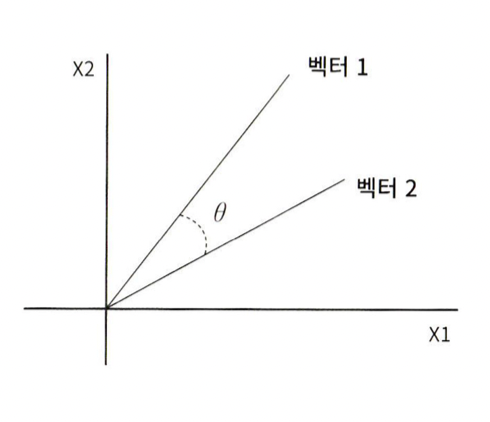

## 2) 두 벡터 사잇각

두 벡터 사잇각에 따라서 상호관계는 유사하거나 관련이 없거나 이예 반대가 될 수 있음

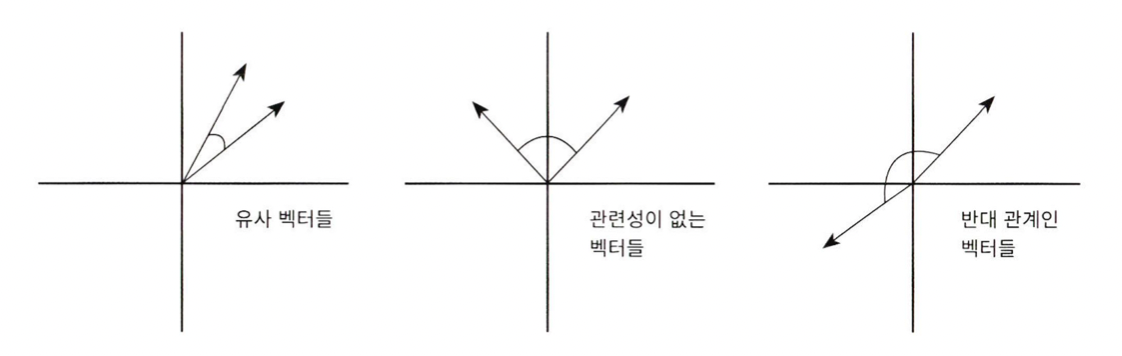

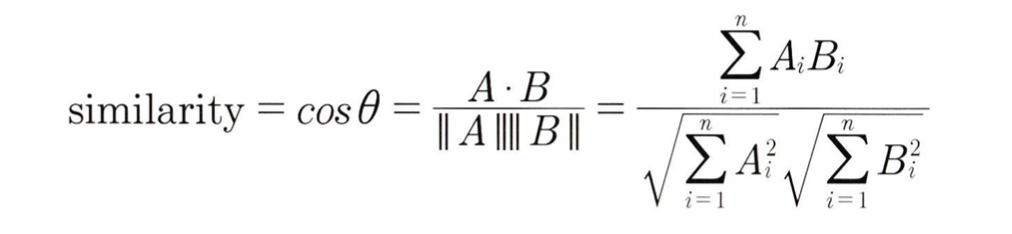

코사인 유사도 문서의 유사도 비교에 가장 많이 사용되는 이유
- 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소행렬이 되기 쉬움, 희소 행렬 기반에서 문서와 문서 벡터간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉬움
- 문서가 매우 긴 경우 단어의 빈도가수도 더 많을 것이기 때문에 빈도수에만 기반해서는 공정한 비교를 할 수 없음

In [13]:
import numpy as np

# 넘파이 배열에 대한 코사인 유사도 구함
def cos_similarity(v1, v2):
  dot_product = np.dot(v1,v2)
  l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2)))) 
  similarity = dot_product/l2_norm

  return similarity

In [11]:
# TF-IDF로 벡터화된 행렬로 변환
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
             'if you take the red pill, you stay in Wonderland',
             'if you take the red pill, I show you how deep the rabbit hole goes']
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [14]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 형태로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장1, 문장2 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장1, 문장2 Cosine 유사도 : 0.402


In [15]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장1, 문장3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)
print('문장2, 문장3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장1, 문장3 Cosine 유사도 : 0.404
문장2, 문장3 Cosine 유사도 : 0.456


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


- 첫번째 문서 자신에 대한 유사도 측정, 첫번째 문서와 두번째 문서의 유사도, 첫번째 문서와 세번째 문서의 유사도 순서

In [17]:
# 1 제거
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [18]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


## 3) Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [20]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/DATA/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text=[]

for file_ in all_files:
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_ipod_nano_8gb,...
1,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...
2,size_asus_netbook_1005ha,...
3,screen_ipod_nano_8gb,...
4,screen_garmin_nuvi_255W_gps,...


In [24]:
tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',
                             ngram_range = (1,2),min_df = 0.05,max_df = 0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 군집화된 데이터, DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화 된 문서들의 DataFrame index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname, ' 와 타 문서 유사도 #####')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정'''

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame index: Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 22, 25, 28, 29, 32, 36],
           dtype='int64')
##### 비교 기준 문서명  battery-life_ipod_nano_8gb  와 타 문서 유사도 #####
[[1.         0.21032724 0.22766637 0.24196947 0.04025051 0.02670592
  0.03505144 0.01821977 0.87235155 0.02477727 0.2100003  0.02141378
  0.01452646 0.01605138 0.12157277 0.0399055  0.17227799 0.01026715
  0.79742523 0.01265576 0.31211549 0.0303119  0.02589076 0.03489765
  0.02911322]]


Text(0.5, 1.0, 'battery-life_ipod_nano_8gb')

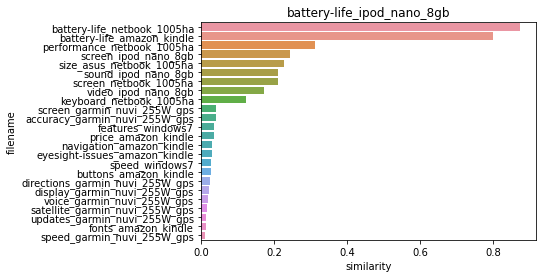

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

# 09. 한글 텍스트 처리 - 네이버 영화 평점 감상 분석

### 1) 한글 NLP 처리의 어려움

띄어쓰기와 다양한 조사 때문에 처리가 어려움

### 2) KoNLPy 소개

대표적인 한글 형태소 패키지
- 형태소 : 단어로서 의미를 가지는 최소 단위
- 형태소 분석 : 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅을 부착하는 작업

In [30]:
! pip install --upgrade pip
! pip install JPype1-0.5.7-cp27-none-win_amd64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: JPype1-0.5.7-cp27-none-win_amd64.whl is not a supported wheel on this platform.


In [33]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 19.0 MB/s eta 0:00:00


In [34]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/DATA/rating/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


- 1이 긍정, 0이 부정 감성

In [35]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

- 균등한 분포를 나타냄

In [36]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경 (정규표현식으로 \d는 숫자를 의미)
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r"\d+", " ",x))

# 테스트 데이터 세트를 로딩하고 동일하게 NULL 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/DATA/rating/ratings_test.txt',sep = '\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d"," ", x))

#id 칼럼 삭제 수행
train_df.drop('id',axis = 1, inplace = True)
test_df.drop('id',axis = 1, inplace = True)

In [37]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text) :
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용, ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer = tw_tokenizer, ngram_range = (1,2), min_df = 3, max_df = 0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [39]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

params = {'C' : [1,3.5,4.5,5.5,10]}

gridcv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
gridcv.fit(tfidf_matrix_train,train_df['label'])
print(gridcv.best_params_, round(gridcv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 3.5} 0.8593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [41]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = gridcv.best_estimator_
pred = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도 :', accuracy_score(test_df['label'],pred))

Logistic Regression 정확도 : 0.86186
